# Importing Libraries 

In [1]:
import cv2
import numpy as np
import face_recognition
import os
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
import pickle
import matplotlib.pyplot as plt

# Functions 

In [5]:
def resize(img, size) :
    width = int(img.shape[0]*size)
    height = int(img.shape[0] * size)
    dimension = (width, height)
    return cv2.resize(img, dimension, interpolation= cv2.INTER_AREA)

In [3]:
def findEncoding(images) :
    imgEncodings = []
    for img in images :
        img = resize(img, 0.50)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encodeimg = face_recognition.face_encodings(img)
        imgEncodings.append(encodeimg)
    return imgEncodings

# Path 

In [6]:
path = 'Project/'

In [7]:
personImg = []
personName = []

filename = 'face.pkl'

try:
    
    for img in os.listdir(path):
        image = cv2.imread(os.path.join(path, img))
        personImg.append(image)

    with open(filename, 'wb') as file:
        pickle.dump(personImg, file)

    print('completed')

except:
    pass

completed


In [27]:
for i in os.listdir(path):
    personName.append(os.path.splitext(i)[0])

In [8]:
%%time

face_data = []

with open(filename, 'rb') as file:
    data = pickle.load(file)
    #face_data.append(data)
    face_data = data

CPU times: total: 1.78 s
Wall time: 3.8 s


In [19]:
filename = 'embeddings.pkl'

imgEmbeddings = []

for face in personImg:
    encodeimg = face_recognition.face_encodings(face)[0]
    imgEmbeddings.append(encodeimg)

with open(filename, 'wb') as file:
    pickle.dump(imgEmbeddings, file)
    
print('Completed')

Completed


In [ ]:
# %%time

embeddings_data = []

with open(filename, 'rb') as file:
    embeddings = pickle.load(file)

# Cosine similarity 

In [2]:
image = cv2.imread('../Project/Mohan krishnan.JPG')
image_encodings = face_recognition.face_encodings(image)
test_img = cv2.imread("D:\Passport size photo.jpg")
test_encodings = face_recognition.face_encodings(test_img)

In [3]:
image.shape

(2912, 5184, 3)

In [4]:
similarity = cosine_similarity([image_encodings[0]], [test_encodings[0]])[0][0]

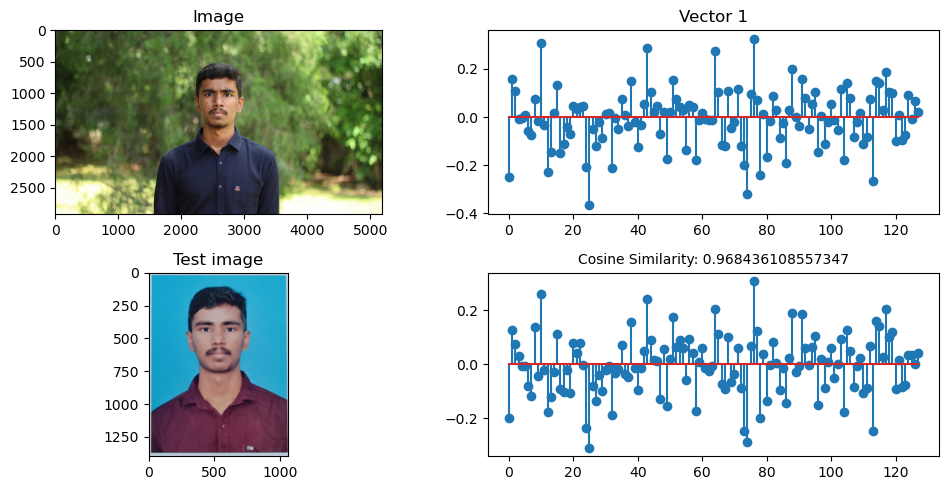

In [9]:
import matplotlib.pyplot as plt

# Assuming image, test_img, image_encodings, test_encodings, and similarity are defined

plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.title('Image')
plt.imshow(image[:, :, ::-1])

plt.subplot(2, 2, 2)
plt.title('Vector 1')
plt.stem(image_encodings[0])

plt.subplot(2, 2, 3)
plt.title('Test image')
plt.imshow(test_img[:, :, ::-1])

plt.subplot(2, 2, 4)
# plt.title('Vector 2')
plt.stem(test_encodings[0])

plt.tight_layout()

# Add the text for cosine similarity at the top
plt.text(0.5, 1.05, f'Cosine Similarity: {similarity}', ha='center', transform=plt.gca().transAxes)

plt.savefig('cosine.png')
plt.show()


# Euclidean distance 

In [20]:
def euclidean_distance(img1, img2):
    
    # Compute the Euclidean distance
    distance = euclidean_distances(img1, img2)
    return distance[0][0]

In [16]:
similarity = euclidean_distances([image_encodings[0]], [test_encodings[0]])[0][0]

In [10]:
similarity

0.34509016562498196

In [21]:
distance = euclidean_distance(image_encodings, test_encodings)
print("Euclidean distance between the two images:", distance)

Euclidean distance between the two images: 0.34509016562498196


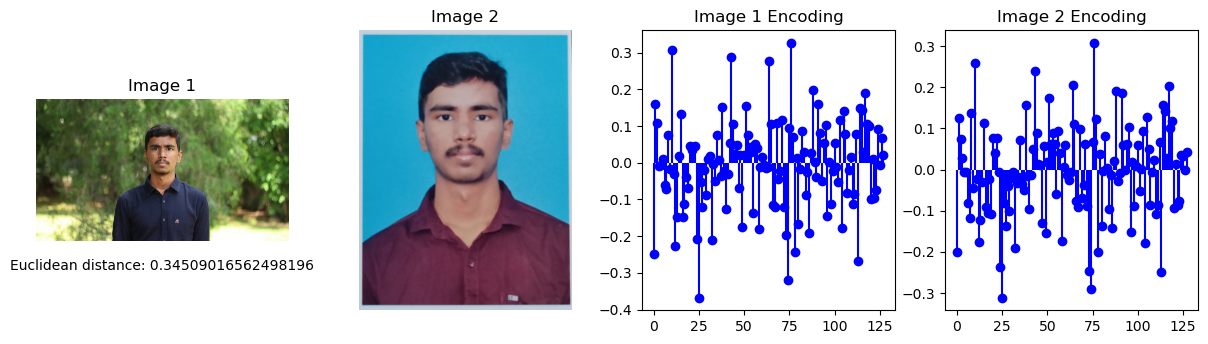

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming image, test_img, image_encodings, test_encodings are defined
distance = 0.5  # Assuming distance is defined
euclidean_distance = 0.34509016562498196  # Example value for Euclidean distance

# Create a figure with subplots to hold all plots
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# Plot the first image
axes[0, 0].imshow(image[:, :, ::-1], cmap='gray')
axes[0, 0].set_title('Image 1')
axes[0, 0].axis('off')

# Plot the second image
axes[0, 1].imshow(test_img[:, :, ::-1], cmap='gray')
axes[0, 1].set_title('Image 2')
axes[0, 1].axis('off')

# Plot the stem plot for the first encoding
axes[0, 2].stem(image_encodings[0], linefmt='b-', markerfmt='bo', basefmt=' ')
axes[0, 2].set_title('Image 1 Encoding')

# Plot the stem plot for the second encoding
axes[0, 3].stem(test_encodings[0], linefmt='b-', markerfmt='bo', basefmt=' ')
axes[0, 3].set_title('Image 2 Encoding')

# Remove the empty plots
for ax in axes[1]:
    ax.remove()

# Add text annotation for Euclidean distance
axes[0, 0].text(0.5, -0.2, f'Euclidean distance: {euclidean_distance}', ha='center', transform=axes[0, 0].transAxes)

# Save the combined figure
fig.savefig('combined_plots_with_text.png', bbox_inches='tight')

plt.show()


Euclidean distance between the two images: 0.0


NameError: name 'img1' is not defined

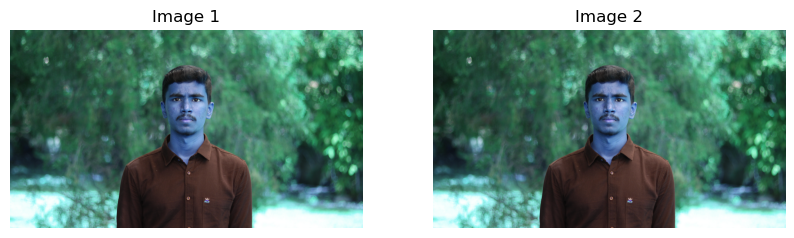

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

def euclidean_distance(img1, img2):
    # Flatten the images to 1D arrays
    img1_flat = img1.flatten().reshape(1, -1)
    img2_flat = img2.flatten().reshape(1, -1)
    
    # Compute the Euclidean distance
    distance = euclidean_distances(img1_flat, img2_flat)
    
    return distance[0][0]

# Example usage:
# Assume img1 and img2 are numpy arrays representing two images
# img1 = ...
# img2 = ...

# Calculate Euclidean distance
distance = euclidean_distance(image, image)
print("Euclidean distance between the two images:", distance)

# Plot the images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Image 1')
axes[0].axis('off')
axes[1].imshow(image, cmap='gray')
axes[1].set_title('Image 2')
axes[1].axis('off')

# Plot the line representing the distance
mid_point = np.array([img1.shape[1] / 2, img1.shape[0] / 2])  # Assuming images are the same size
distance_vector = img2.shape[1] / 2 - img1.shape[1] / 2, img2.shape[0] / 2 - img1.shape[0] / 2
axes[0].annotate('', mid_point + distance_vector, mid_point, arrowprops=dict(arrowstyle='->', color='red'))

plt.show()


In [40]:
cap = cv2.VideoCapture(0)
while True :
    ret, frame = cap.read()
    #Smaller_frames = cv2.resize(frame, (0,0), None, 0.25, 0.25)

    facesInFrame = face_recognition.face_locations(frame)
    encodeFacesInFrame = face_recognition.face_encodings(frame, facesInFrame)

    for encodeFace, faceloc in zip(encodeFacesInFrame, facesInFrame) :
        matches = face_recognition.compare_faces(imgEmbeddings, encodeFace)
        facedis = face_recognition.face_distance(imgEmbeddings, encodeFace)
        #print(facedis)
        matchIndex = np.argmin(facedis)

        if matches[matchIndex] :
            name = personName[matchIndex].upper()
            faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
            faces = faceCascade.detectMultiScale(frame,1.3,3)
            
            if len(faces)==1:

                for(x,y,w,h) in faces:
                    cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0),5)
                    #cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)
                    #cv2.rectangle(frame, (x1, y2-25), (x2, y2), (0, 255, 0), cv2.FILLED)
                    cv2.putText(frame, name, (x1+6, y2-6), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
            
      
    cv2.imshow('Entry',frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break


#print(facedis)
print(name)


cap.release()
cv2.destroyAllWindows()

MOHAN KRISHNAN


In [39]:
cap.release()
cv2.destroyAllWindows()

In [26]:
personName

[]

In [42]:
names = ['Abdul', 'Abiram', 'Abirami', 'Abishek ram', 'Adarsh', 'Akilesh', 'Aravind', 'Arun madhavan', 'Ashvath', 'Ashwin', 'Dhanyaa', 'Dharan raj', 'Dharanish', 'Dharshini', 'Ellakiya', 'Farooq', 'Farzin', 'Gokul', 'Hari prakash', 'Haritha', 'Illamugi', 'Kailas', 'Kalyan', 'Lakshmi Meera mam', 'Logita', 'Madanica', 'Mohan krishnan', 'Mukilan', 'Murali', 'Nandha kumar', 'Nandy', 'Navin', 'Nethra', 'Niranjana', 'Nirmal kumar', 'Nisanth', 'Nithish', 'Nithyashree', 'Oviya', 'Prabakaran', 'Prawin', 'Rakesh', 'Rithivik', 'Rupa', 'Sarvesh', 'Selva kumaran', 'Selva vishnu raj', 'senthi', 'Shankari', 'Sibi', 'Siva chandru', 'Sri hari', 'Sri harshitha', 'Sri Nandha SS', 'Srinithi', 'Sriram', 'Suganya', 'Suriyapriya', 'Swetha Intern', 'Swetha', 'Tharika', 'thoufiq', 'Thrisha vaishnavi', 'Thusar balaji', 'Vaishnavi', 'Vijay', 'Yogeswari']

In [ ]:
name = 'Mo'